# Stock Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [15]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
from pathlib import Path

%matplotlib inline


### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["FB", "AMZN", "PG", "XOM", "JPM", "JNJ", "HON", "LIN", "AMT", "AAPL", "NEE"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
stock_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

stock_prices_df

AAPL                                       AMT  \
                              open    high     low   close    volume    open   
time                                                                           
2018-01-02 00:00:00-05:00  170.160  172.30  169.26  172.26  20523941  143.11   
2018-01-03 00:00:00-05:00  172.530  174.55  171.96  172.18  23193409  141.05   
2018-01-04 00:00:00-05:00  172.540  173.47  172.08  173.02  17742231  141.44   
2018-01-05 00:00:00-05:00  173.440  175.37  173.05  174.96  18402859  140.23   
2018-01-08 00:00:00-05:00  174.310  175.61  173.93  174.34  15554212  140.66   
...                            ...     ...     ...     ...       ...     ...   
2021-11-01 00:00:00-04:00  148.985  149.70  147.80  148.99  57758481  282.83   
2021-11-02 00:00:00-04:00  148.670  151.57  148.65  150.00  61741508  282.81   
2021-11-03 00:00:00-04:00  150.370  151.97  149.82  151.49  44064848  283.72   
2021-11-04 00:00:00-04:00  151.620  152.43  150.64  150.96  49782226  281.61   
2021-11-05 00:00:00-04:00  151.810  152.20  150.06  151.24  54619968  280.94   

                                                                ...      PG  \
                             high      low    close     volume  ...    open   
time                                                            ...           
2018-01-02 00:00:00-05:00  143.22  140.910  141.105  1391810.0  ...   91.92   
2018-01-03 00:00:00-05:00  142.50  140.860  141.570  1210542.0  ...   90.98   
2018-01-04 00:00:00-05:00  141.96  139.580  139.630  1037487.0  ...   90.83   
2018-01-05 00:00:00-05:00  140.70  139.590  140.490  1363577.0  ...   91.15   
2018-01-08 00:00:00-05:00  143.24  140.660  142.030  1350838.0  ...   90.93   
...                           ...      ...      ...        ...  ...     ...   
2021-11-01 00:00:00-04:00  283.16  276.410  282.120  1197575.0  ...  143.36   
2021-11-02 00:00:00-04:00  285.29  279.510  282.650  1300858.0  ...  142.72   
2021-11-03 00:00:00-04:00  285.42  276.465  280.660   901567.0  ...  144.00   
2021-11-04 00:00:00-04:00  283.45  277.640  279.100  1204187.0  ...  142.84   
2021-11-05 00:00:00-04:00  281.44  276.700  277.700   946849.0  ...  145.44   

                                                                XOM           \
                             high      low   close   volume    open     high   
time                                                                           
2018-01-02 00:00:00-05:00   91.93   90.550   90.66  5257189  83.820  85.1950   
2018-01-03 00:00:00-05:00   91.09   90.515   90.57  3976843  85.160  86.9650   
2018-01-04 00:00:00-05:00   91.77   90.610   91.18  4316526  86.780  87.2200   
2018-01-05 00:00:00-05:00   91.30   90.570   91.19  3848619  86.750  86.8800   
2018-01-08 00:00:00-05:00   91.77   90.930   91.71  3298886  86.700  87.1500   
...                           ...      ...     ...      ...     ...      ...   
2021-11-01 00:00:00-04:00  143.80  142.490  142.65  3830443  65.070  66.0795   
2021-11-02 00:00:00-04:00  144.58  142.280  144.06  8615444  65.030  65.4470   
2021-11-03 00:00:00-04:00  145.11  143.520  145.01  6435443  64.020  64.4500   
2021-11-04 00:00:00-04:00  145.39  142.335  145.38  4899598  64.675  64.8900   
2021-11-05 00:00:00-04:00  146.37  144.800  146.03  4685846  65.050  65.3254   

                                                       
                               low    close    volume  
time                                                   
2018-01-02 00:00:00-05:00  83.6600  85.0457   8932356  
2018-01-03 00:00:00-05:00  84.8200  86.7000  11158484  
2018-01-04 00:00:00-05:00  86.4300  86.8100   8186390  
2018-01-05 00:00:00-05:00  85.7050  86.6900   8326333  
2018-01-08 00:00:00-05:00  86.6034  87.0800   5989082  
...                            ...      ...       ...  
2021-11-01 00:00:00-04:00  65.0200  65.6200  16748443  
2021-11-02 00:00:00-04:00  64.6600  64.8200  13844728  
2021-11-03 00:00:00-04:00  63.6600  63.9300  13916440  
2021-11-0

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
stock_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  stock_closing_prices_df[ticker] = stock_prices_df[ticker]["close"]

stock_closing_prices_df

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-02 00:00:00-05:00,181.430,1189.00,90.66,85.0457,108.00,139.2400,153.66,156.17,141.105,172.26,155.11
2018-01-03 00:00:00-05:00,184.480,1202.74,90.57,86.7000,108.04,140.5300,152.45,157.52,141.570,172.18,151.80
2018-01-04 00:00:00-05:00,184.320,1209.64,91.18,86.8100,109.05,140.5256,154.46,159.97,139.630,173.02,150.93
2018-01-05 00:00:00-05:00,186.780,1229.07,91.19,86.6900,108.26,141.6600,155.47,161.27,140.490,174.96,151.71
2018-01-08 00:00:00-05:00,188.250,1246.95,91.71,87.0800,108.48,141.8500,154.73,161.25,142.030,174.34,152.98
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00-04:00,330.020,3317.99,142.65,65.6200,169.76,162.9900,219.78,322.94,282.120,148.99,85.59
2021-11-02 00:00:00-04:00,328.200,3313.17,144.06,64.8200,170.49,165.6000,221.21,327.63,282.650,150.00,85.43
2021-11-03 00:00:00-04:00,331.695,3384.00,145.01,63.9300,170.55,165.1200,222.80,328.42,280.660,151.49,85.23


### Calculate the Daily Returns Per Stock in our Stock Portfolio

In [11]:
# Calculate the daily returns for every stock in the Stock Portfolio
per_stock_daily_returns = stock_closing_prices_df.pct_change().dropna()
per_stock_daily_returns

,FB,AMZN,PG,XOM,JPM,JNJ,HON,LIN,AMT,AAPL,NEE
time,,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.016811,0.011556,-0.000993,0.019452,0.000370,0.009265,-0.007875,0.008644,0.003295,-0.000464,-0.021340
2018-01-04 00:00:00-05:00,-0.000867,0.005737,0.006735,0.001269,0.009348,-0.000031,0.013185,0.015554,-0.013703,0.004879,-0.005731
2018-01-05 00:00:00-05:00,0.013346,0.016063,0.000110,-0.001382,-0.007244,0.008073,0.006539,0.008127,0.006159,0.011213,0.005168
2018-01-08 00:00:00-05:00,0.007870,0.014548,0.005702,0.004499,0.002032,0.001341,-0.004760,-0.000124,0.010962,-0.003544,0.008371
2018-01-09 00:00:00-05:00,-0.001859,0.004948,-0.006760,-0.003101,0.006914,0.016567,0.008596,0.010357,-0.007393,-0.000057,-0.007125
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00-04:00,0.019902,-0.016143,-0.002448,0.017838,-0.001059,0.000798,0.005306,0.011527,0.001455,-0.005407,0.003517
2021-11-02 00:00:00-04:00,-0.005515,-0.001453,0.009884,-0.012191,0.004300,0.016013,0.006507,0.014523,0.001879,0.006779,-0.001869
2021-11-03 00:00:00-04:00,0.010649,0.021378,0.006594,-0.013730,0.000352,-0.002899,0.007188,0.002411,-0.007041,0.009933,-0.002341


### Calculate Aggregate Daily Returns for Portfolio

In [12]:
# Calculate the daily returns for of the Stock Portfolio
stock_daily_returns_df = stock_closing_prices_df.sum(axis=1).pct_change().dropna()
stock_daily_returns_df

time
2018-01-03 00:00:00-05:00    0.006571
2018-01-04 00:00:00-05:00    0.004232
2018-01-05 00:00:00-05:00    0.010777
2018-01-08 00:00:00-05:00    0.008411
2018-01-09 00:00:00-05:00    0.003351
                               ...   
2021-11-01 00:00:00-04:00   -0.008034
2021-11-02 00:00:00-04:00    0.000916
2021-11-03 00:00:00-04:00    0.014400
2021-11-04 00:00:00-04:00    0.018027
2021-11-05 00:00:00-04:00    0.008815
Length: 969, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

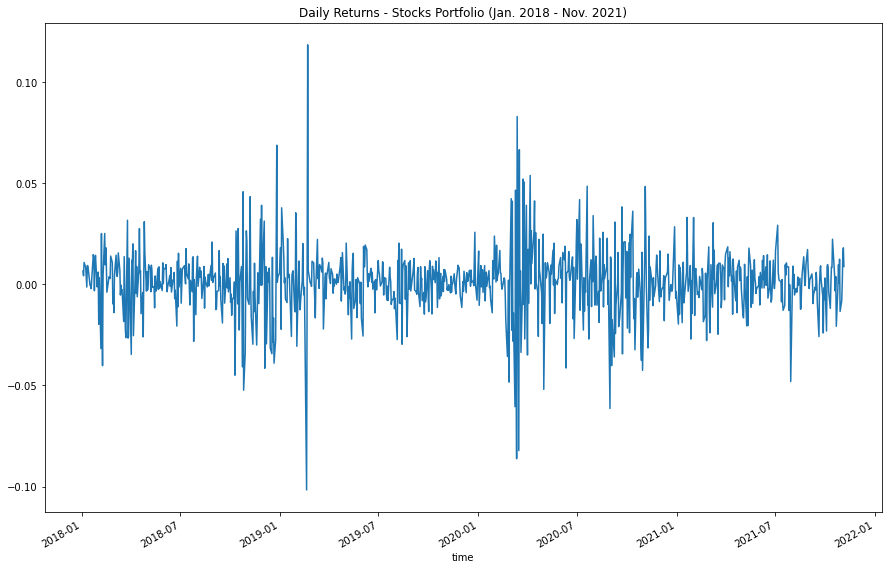

In [13]:
# Plot daily returns for the stocks portfolio
stock_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Stocks Portfolio (Jan. 2018 - Nov. 2021)")

## Calculate the Cumulative Returns of the Portfolio

In [14]:
# Calculate Cumulative Returns for Stock Portfolio
stock_cumulative_returns_df = (1 + stock_daily_returns_df).cumprod() - 1
stock_cumulative_returns_df

time
2018-01-03 00:00:00-05:00    0.006571
2018-01-04 00:00:00-05:00    0.010831
2018-01-05 00:00:00-05:00    0.021725
2018-01-08 00:00:00-05:00    0.030318
2018-01-09 00:00:00-05:00    0.033771
                               ...   
2021-11-01 00:00:00-04:00    1.040864
2021-11-02 00:00:00-04:00    1.042734
2021-11-03 00:00:00-04:00    1.072149
2021-11-04 00:00:00-04:00    1.109504
2021-11-05 00:00:00-04:00    1.128099
Length: 969, dtype: float64

### Read the Cumulative Returns Series into a CSV

In [16]:
# Read the CUmulative Returns Series into a CSV
stock_cumulative_returns_df.to_csv(Path("../data/cum_returns_stocks.csv"))

### Plot Cumulative Returns for Portfolio

In [ ]:
# Plot Cumulative Returns for Stock Portfolio
stock_cumulative_returns_df.plot(figsize=(15,10), title="Cumulative Returns - Stocks Portfolio (Jan. 2020 - Jan. 2021)")

## Set Up and Run Monte Carlo Simulation for 10 Years

In [ ]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_stock_ten_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_stock_ten_year.portfolio_data.head()

### Run the MC Simulation for 10 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_ten_year.calc_cumulative_return()

### Plot the MC 10 Year Simulation Visualization

In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_stock_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization

In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_stock_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_stock_ten_year_summary_statistics = MC_stock_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_stock_ten_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
stock_ten_year_lower_ci = round(MC_stock_ten_year_summary_statistics[8]*10000, 2)
stock_ten_year_upper_ci = round(MC_stock_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${stock_ten_year_lower_ci} and ${stock_ten_year_upper_ci}")

## Set Up and Run Monte Carlo Simulation for 30 Years

In [ ]:
# Set up Monte Carlo Simulation for a 30 year time period with a $10,000 initial investment
MC_stock_thirty_year = MCSimulation(
  portfolio_data=stock_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 30
)

MC_stock_thirty_year.portfolio_data.head()

### Run the MC Simulation for 30 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_thirty_year.calc_cumulative_return()

### Plot the MC 30 Year Simulation Visualization

In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_stock_thirty_year.plot_simulation()

### Plot the MC 30 Year Simulation Distribution Visualization

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_stock_thirty_year.plot_distribution()

### Generate MC 30 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_stock_thirty_year_summary_statistics = MC_stock_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_stock_thirty_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 30 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
stock_thirty_year_lower_ci = round(MC_stock_thirty_year_summary_statistics[8]*10000, 2)
stock_thirty_year_upper_ci = round(MC_stock_thirty_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${stock_thirty_year_lower_ci} and ${stock_thirty_year_upper_ci}")

## Calculate the Standard Deviation & Annualized Standard Deviation for Our Stock Portfolio

In [ ]:
# Calculate Standard Deviation for our Stock Portfolio
stock_standard_deviation = per_stock_daily_returns.std()
stock_standard_deviation = stock_standard_deviation.sort_values()
stock_standard_deviation

### Calculate Annualized Standard Deviation

In [ ]:
# Calculate Annualized Standard Deviation for our Stock Portfolio
stock_annualized_standard_deviation = stock_standard_deviation * np.sqrt(252)
stock_annualized_standard_deviation = stock_annualized_standard_deviation.sort_values()
stock_annualized_standard_deviation

## Calculate the Sharpe Ratio for our Stock Portfolio

### Calculate the Annualized Returns

In [ ]:
# Calculate the Annualized Returns for our Stock Portfolio 
stock_annualized_returns = per_stock_daily_returns.mean() * 252
stock_annualized_returns = stock_annualized_returns.sort_values()
stock_annualized_returns

### Calculate the Sharpe Ratio

In [ ]:
# Calculate the Sharpe Ratio for Our Stock Portfolio
stock_portfolio_sharpe_ratio = stock_annualized_returns / stock_annualized_standard_deviation
stock_portfolio_sharpe_ratio = stock_portfolio_sharpe_ratio.sort_values()
stock_portfolio_sharpe_ratio

### Calculate the Overall Sharpe Ratio for our Stock Portfolio

In [ ]:
# Calculate the Average Sharpe Ratio for our Stock Portfolio
stock_portfolio_average_sharpe_ratio = stock_portfolio_sharpe_ratio.mean()
print(f"{stock_portfolio_average_sharpe_ratio: .3f}")